<a href="https://colab.research.google.com/github/nafilahanum/Prediksi-Ranking-QS-WUR-dan-Faktor-Penentunya/blob/main/DATAMINING_SMT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


KELOMPOK 11

1.   DAFANOV DIXIE EINKINDEREN
2.   NAFILA HANUM AL HASANIY
3.   BERLIANTI DEBBY MAHARANI
4.   NISRINA AFAF





# LOAD DATA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/QS World University Rankings 2025 (Top global universities).csv', encoding='latin1')


# EDA

In [ ]:
df

,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,100.0,...,100,86.8,143,96.0,58,100.0,8,99.0,15=,100
1,2,6,Imperial College London,United Kingdom,Europe,L,FC,VH,A,98.5,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,100.0,...,120,97.7,73,100.0,1,100.0,3,85.0,126,96.9
3,4,4,Harvard University,United States,Americas,L,FC,VH,B,100.0,...,269,69.0,215,99.6,5,100.0,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,L,FC,VH,A,100.0,...,73,94.8,98,99.3,10,100.0,5,84.8,127=,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,United States,Americas,M,CO,HI,A,3.0,...,701+,1.9,701+,6.5,701+,3.1,701+,1.0,701+,NaN
1499,1401+,1401+,University of Oradea,Romania,Europe,L,FC,MD,A,5.6,...,701+,5.2,701+,34.5,701+,6.2,701+,2.3,701+,NaN
1500,1401+,1201-1400,University of San Carlos,Philippines,Asia,M,CO,MD,C,7.2,...,701+,2.1,701+,6.4,701+,9.6,701+,1.0,701+,NaN
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",Romania,Europe,L,FO,VH,A,4.1,...,701+,2.5,701+,18.6,701+,3.9,701+,1.1,701+,NaN


In [ ]:
df.isnull().sum()

,0
RANK_2025,0
RANK_2024,21
Institution_Name,0
Location,0
Region,0
SIZE,0
FOCUS,0
RES.,0
STATUS,37
Academic_Reputation_Score,0


In [ ]:
df.shape

(1503, 28)

In [ ]:
df.dtypes

,0
RANK_2025,object
RANK_2024,object
Institution_Name,object
Location,object
Region,object
SIZE,object
FOCUS,object
RES.,object
STATUS,object
Academic_Reputation_Score,float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


## Visualisasi Distribusi dan Tren Berdasarkan Peringkat Pada Tahun 2025

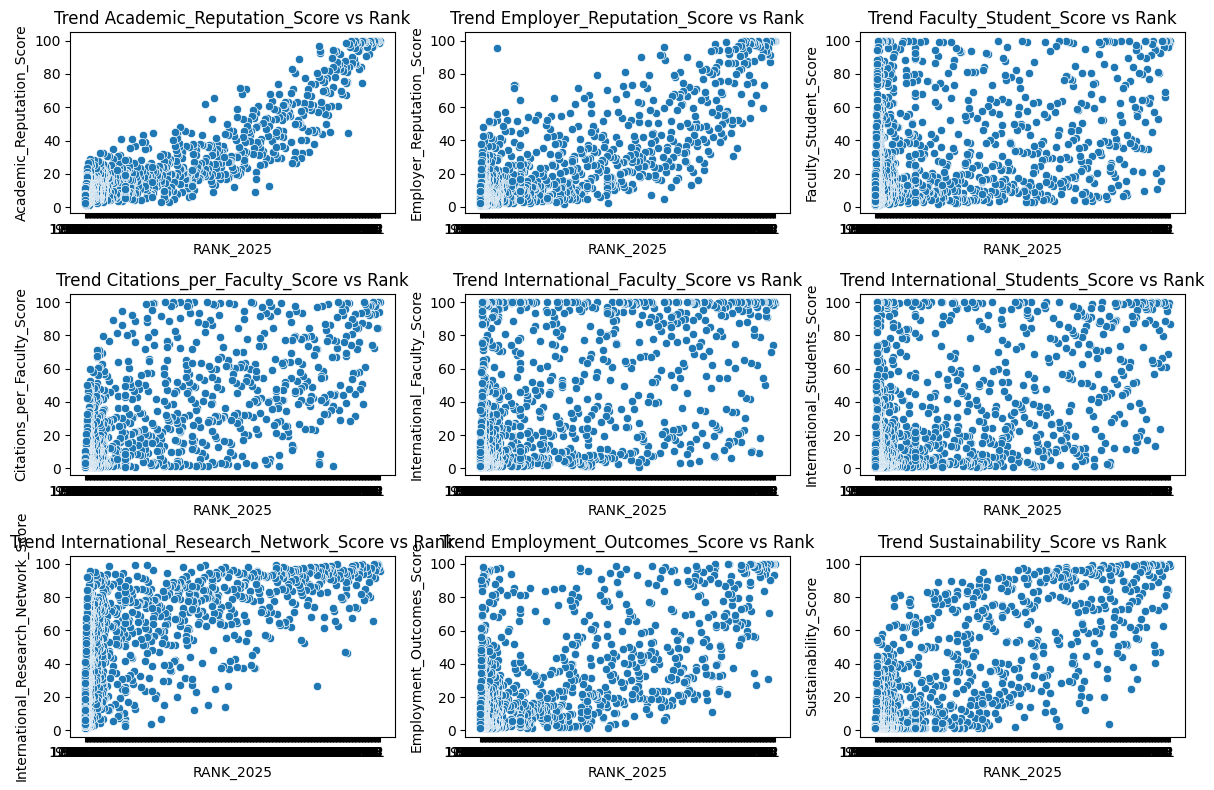

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=df, x='RANK_2025', y=col)
    plt.title(f'Trend {col} vs Rank')
    plt.gca().invert_xaxis()  # Rank 1 di kiri
plt.tight_layout()
plt.show()



## Distribusi Universitas Berdasarkan Fokus Riset per Region


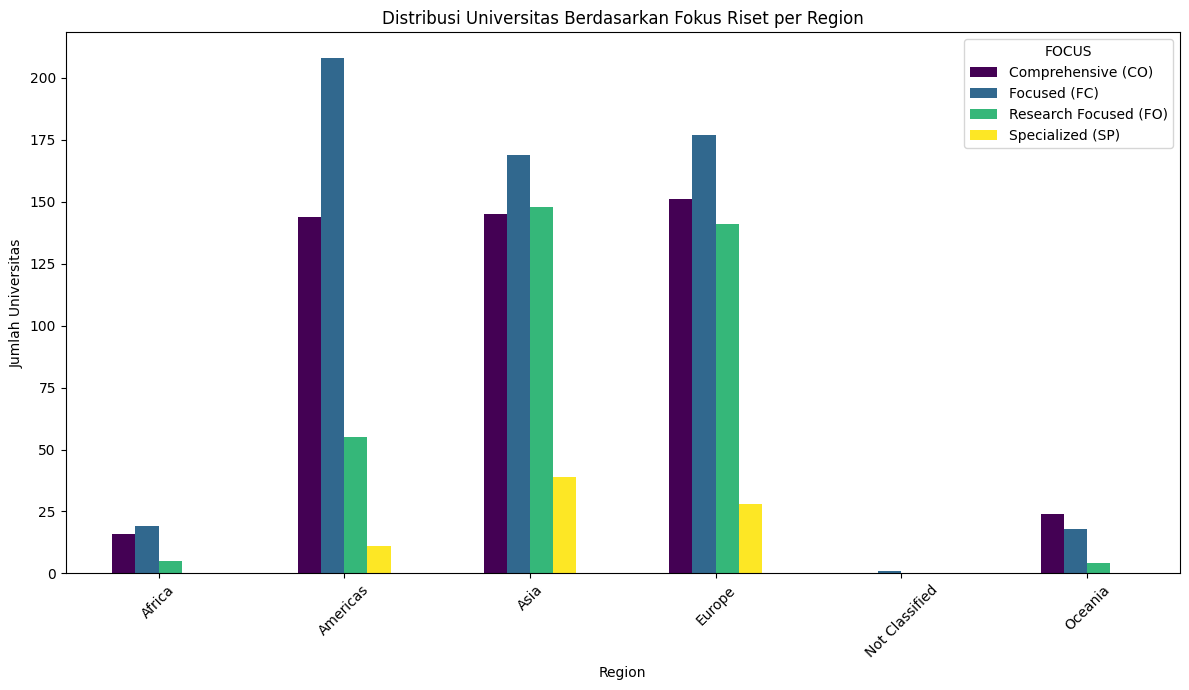

In [ ]:
focus_region_counts = df.groupby(['Region', 'FOCUS']).size().unstack(fill_value=0)

focus_region_counts = focus_region_counts.rename(columns={
    'CO': 'Comprehensive (CO)',
    'FC': 'Focused (FC)',
    'FO': 'Research Focused (FO)',
    'SP': 'Specialized (SP)'
})

focus_region_counts.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Distribusi Universitas Berdasarkan Fokus Riset per Region')
plt.xlabel('Region')
plt.ylabel('Jumlah Universitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Heatmap distribusi universitas riset per region

Unique values in FOCUS column: ['CO' 'FC' 'FO' 'SP']
Jumlah universitas riset: 0


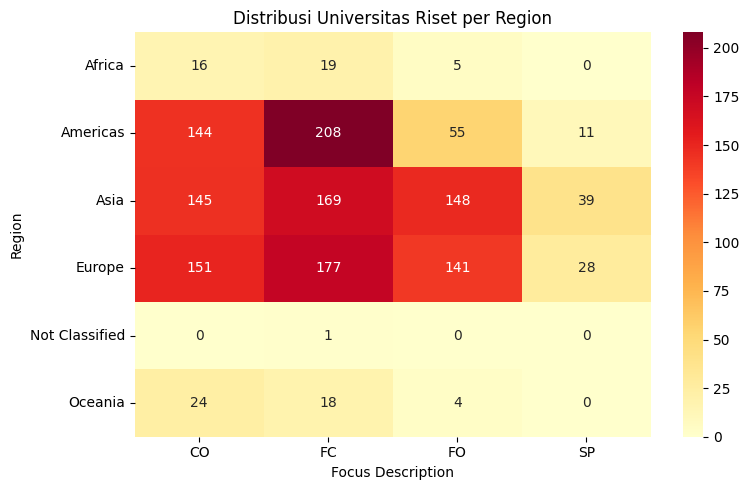

In [ ]:
print("Unique values in FOCUS column:", df['FOCUS'].unique())

research_universities = df[df['FOCUS'] == 'Research Focused']

print(f"Jumlah universitas riset: {len(research_universities)}")

count_per_region = research_universities['Region'].value_counts().sort_values(ascending=False)

proportion_per_region = research_universities['Region'].value_counts(normalize=True).sort_values(ascending=False)

cross_tab = pd.crosstab(df['Region'], df['FOCUS'])
plt.figure(figsize=(8, 5))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Distribusi Universitas Riset per Region")
plt.xlabel("Focus Description")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

## Top 20 universitas berdasarkan overall score

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

<ipython-input-12-a8cfec7eb173>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x="Overall_Score", y="Institution_Name", palette='viridis')


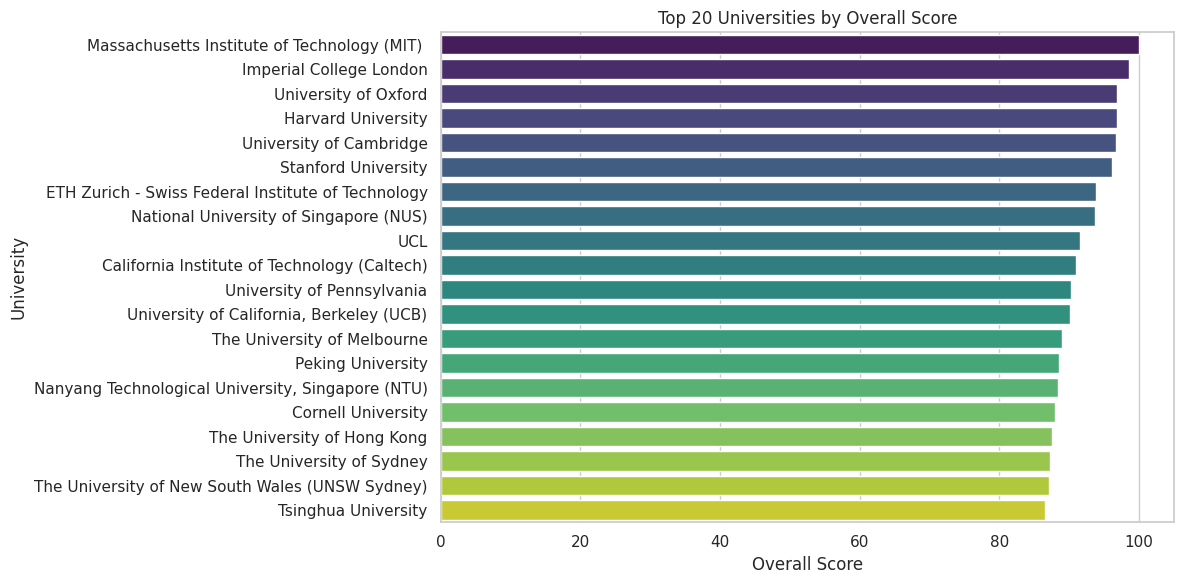

In [ ]:
df["Overall_Score"] = pd.to_numeric(df["Overall_Score"], errors="coerce")

top20 = df[df["Overall_Score"].notnull()].sort_values("Overall_Score", ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top20, x="Overall_Score", y="Institution_Name", palette='viridis')
plt.title("Top 20 Universities by Overall Score")
plt.xlabel("Overall Score")
plt.ylabel("University")
plt.tight_layout()
plt.show()

## Top 15 negara dengan universitas terbanyak

Text(0.5, 1.0, 'Universities by Country')

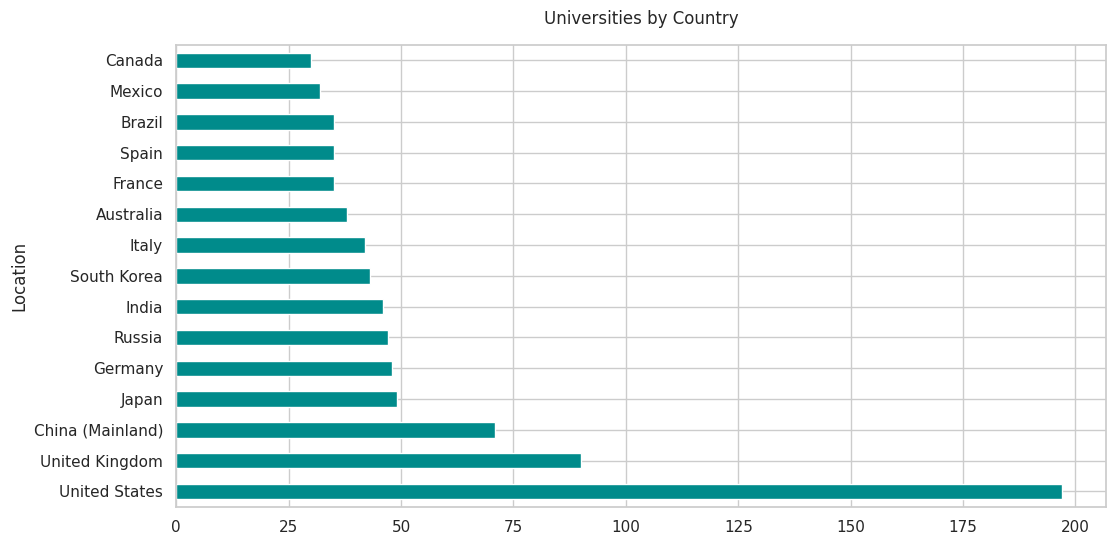

In [ ]:
df['Location'].value_counts().head(15).plot(kind='barh', color='darkcyan')
plt.title('Universities by Country', pad=15)

## Peta sebaran overall score di dunia

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns

pio.renderers.default = 'colab'
location_scores = df.groupby('Location')['Overall_Score'].sum().reset_index()

fig = px.choropleth(
    location_scores,
    locations='Location',
    locationmode='country names',
    color='Overall_Score',
    hover_name='Location',
    color_continuous_scale='viridis',
    title='Sum Overall Score by Country (QS World University Rankings 2025)'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()



## Matriks korelasi pada semua kolom score

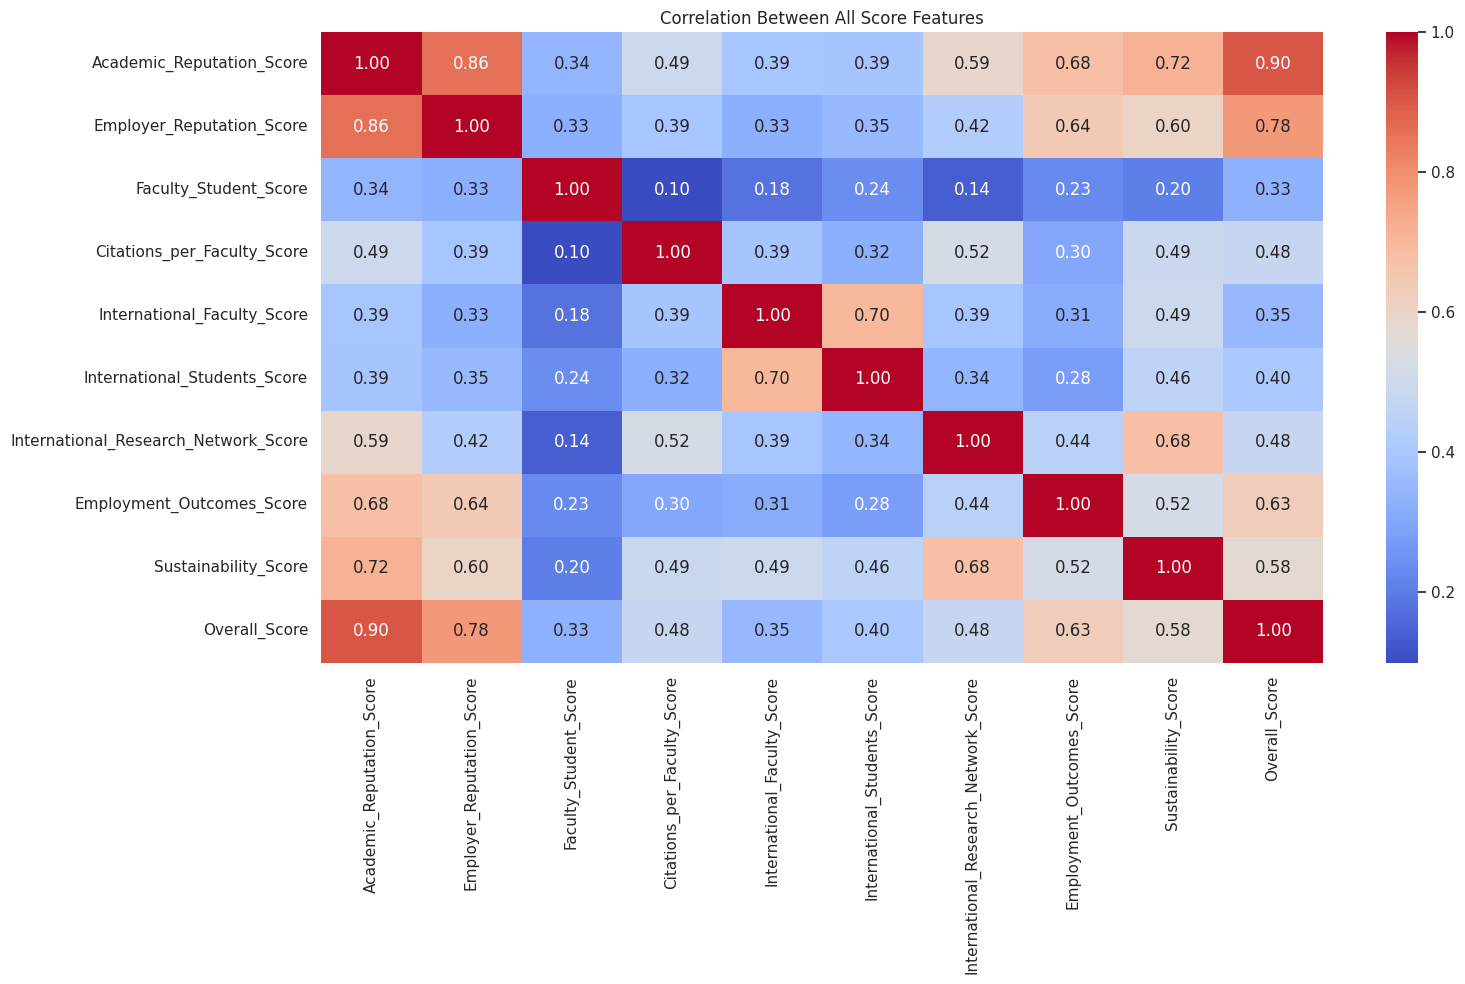

In [ ]:
score_cols = df.filter(like="Score").columns
plt.figure(figsize=(16, 10))
sns.heatmap(df[score_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between All Score Features")
plt.tight_layout()
plt.show()

## Scatterplot


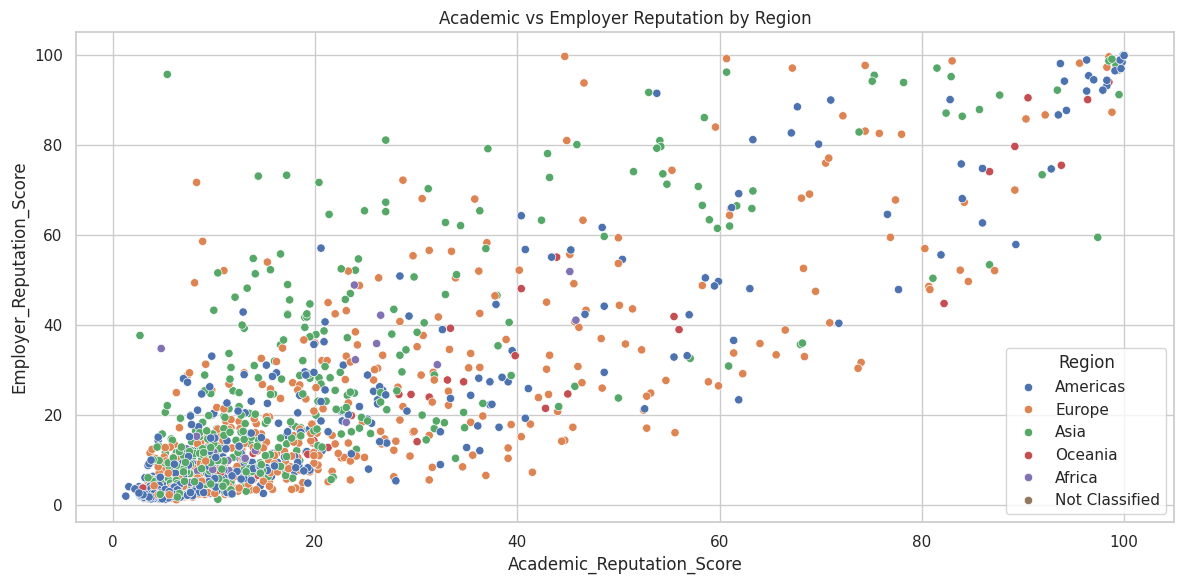

In [ ]:
plt.figure()
sns.scatterplot(data=df, x="Academic_Reputation_Score", y="Employer_Reputation_Score", hue="Region")
plt.title("Academic vs Employer Reputation by Region")
plt.tight_layout()
plt.show()

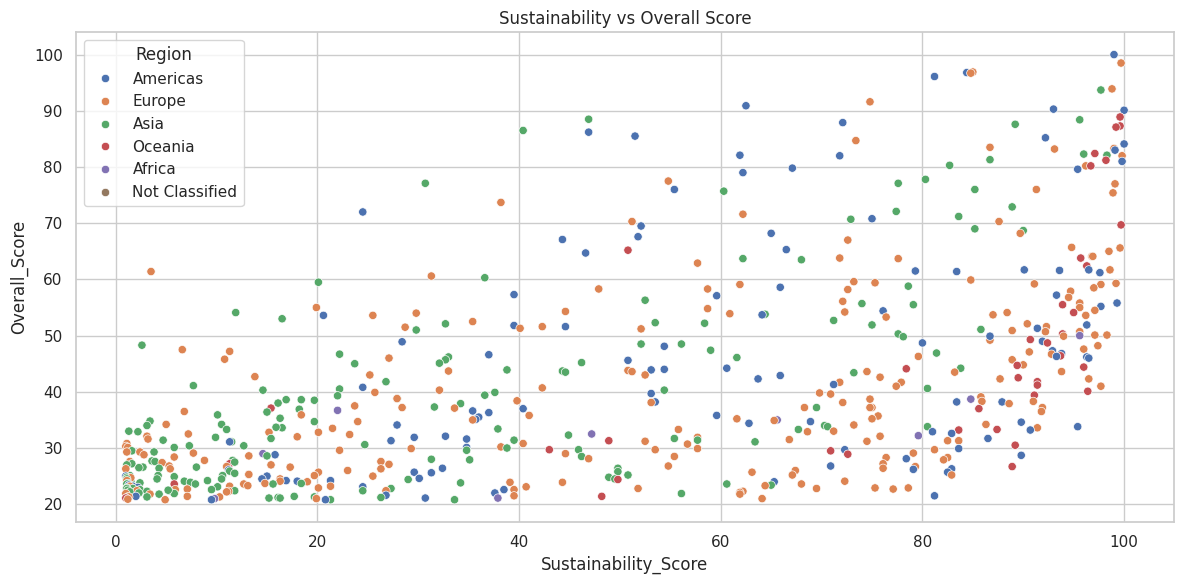

In [ ]:
plt.figure()
sns.scatterplot(data=df, x="Sustainability_Score", y="Overall_Score", hue="Region")
plt.title("Sustainability vs Overall Score")
plt.tight_layout()
plt.show()

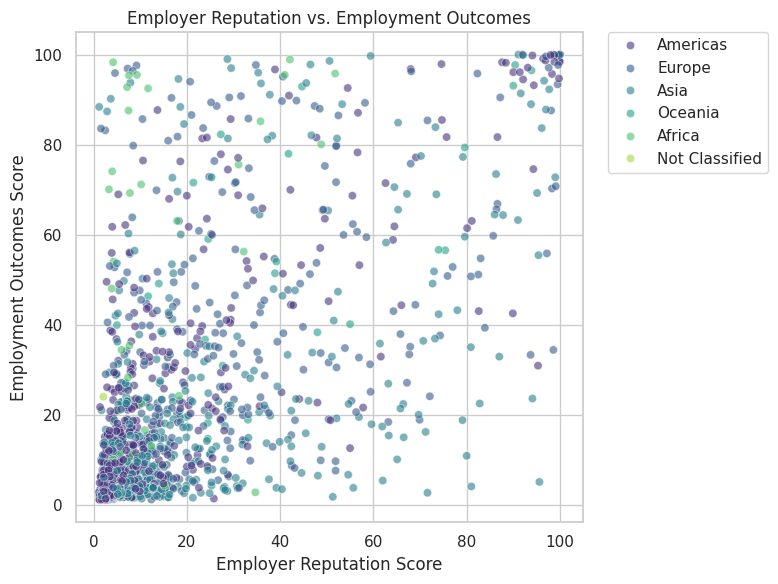

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Employer_Reputation_Score', y='Employment_Outcomes_Score',
                hue='Region', alpha=0.6, palette='viridis')
plt.title('Employer Reputation vs. Employment Outcomes')
plt.xlabel('Employer Reputation Score')
plt.ylabel('Employment Outcomes Score')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.tight_layout()


## KDE

Text(0, 0.5, 'Employment Outcomes Score')

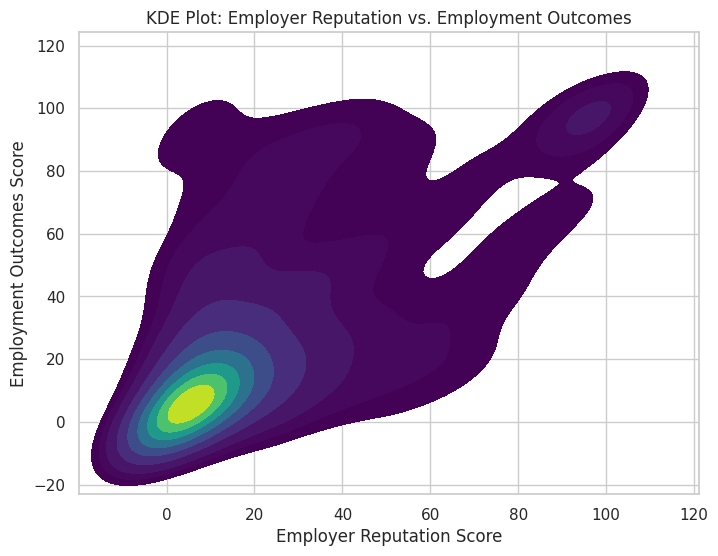

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Employer_Reputation_Score', y='Employment_Outcomes_Score',
            cmap="viridis", fill=True, thresh=0.05)
plt.title('KDE Plot: Employer Reputation vs. Employment Outcomes')
plt.xlabel('Employer Reputation Score')
plt.ylabel('Employment Outcomes Score')


# PREPROCESSING

## Menangani Missing Value

In [ ]:
df = df.dropna(subset=["Overall_Score"])

## Mengisi kolom STATUS dengan modus

In [ ]:
df["STATUS"] = df["STATUS"].fillna(df["STATUS"].mode()[0])

<ipython-input-21-0eb524bcc7ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Mengisi kolom score dengan mean

In [ ]:
score_fill_cols = [
    "International_Faculty_Score", "International_Students_Score",
    "International_Research_Network_Score", "Sustainability_Score"
]
for col in score_fill_cols:
    df[col] = df[col].fillna(df[col].mean())

<ipython-input-22-a2ccc7736448>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Mengisi rank kolom yg hilang

In [ ]:
rank_fill_cols = [
    "RANK_2024", "International_Faculty_Rank", "International_Students_Rank",
    "International_Research_Network_Rank", "Sustainability_Rank"
]
for col in rank_fill_cols:
    df[col] = df[col].fillna('999')

<ipython-input-23-e5f8a03160f6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
RANK_2025                               0
RANK_2024                               0
Institution_Name                        0
Location                                0
Region                                  0
SIZE                                    0
FOCUS                                   0
RES.                                    0
STATUS                                  0
Academic_Reputation_Score               0
Academic_Reputation_Rank                0
Employer_Reputation_Score               0
Employer_Reputation_Rank                0
Faculty_Student_Score                   0
Faculty_Student_Rank                    0
Citations_per_Faculty_Score             0
Citations_per_Faculty_Rank              0
International_Faculty_Score             0
International_Faculty_Rank              0
International_Students_Score            0
International_Students_Rank             0
International_Research_Network_Score    0
International_Research_Network_Rank     0
Emp

## Mengubah tipe data kolom RANK_2024 & RANK_2025 ke dalam bentuk numerik

In [ ]:
df["RANK_2024"] = pd.to_numeric(df["RANK_2024"], errors="coerce")
df["RANK_2025"] = pd.to_numeric(df["RANK_2025"], errors="coerce")

<ipython-input-25-9fff153a74e6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-9fff153a74e6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Membuat kolom Rank_change

In [ ]:
df.isnull().sum()

,0
RANK_2025,0
RANK_2024,26
Institution_Name,0
Location,0
Region,0
SIZE,0
FOCUS,0
RES.,0
STATUS,0
Academic_Reputation_Score,0


## Membuat kolom baru

In [ ]:
df = df.dropna(subset=["RANK_2024", "RANK_2025"])

df["Rank_Change"] = df["RANK_2024"] - df["RANK_2025"]


# Menghilangkan Not Classified pada kolom Region

In [ ]:
df['Region'].unique()

array(['Americas', 'Europe', 'Asia', 'Oceania', 'Africa'], dtype=object)

In [ ]:
df[df['Region'] == 'Not Classified']

,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score,Rank_Change


Universitas Mediterania Timur terletak di Famagusta, Siprus Utara(Gűrsoy & Kunt, 2019) (Nourafkan et al., 2020).

Gűrsoy, S., & Kunt, N. (2019). Acculturation of university students in Northern Cyprus. Culture and Psychology, 25(2), 146–160. https://doi.org/10.1177/1354067X18808213

Jobbehdar Nourafkan, N., Jumah, B., Asif, R., & Dehghanmongabadi, A. (2020). Conflicts between Students Living on-Campus Dormitories: The Case of Dormitories at Eastern Mediterranean University Campus. 3(4), 31–43. https://doi.org/10.33215/SJOM.V3I4.397

EMU menduduki peringkat ke-656 universitas terbaik di Eropa pada tahun 2024.

https://www.emu.edu.tr/en/about-emu/accreditations-recognitions-rankings-memberships/597

In [ ]:
df.loc[
    (df['Institution_Name'] == 'Eastern Mediterranean University') & (df['Region'] == 'Not Classified'),
    'Region'
] = 'Europe'

df[(df['Institution_Name'] == 'Eastern Mediterranean University') & (df['Region'] == 'Europe')]


,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score,Rank_Change


## Melihat jumlah duplikat

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")


Jumlah baris duplikat: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 599
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RANK_2025                             574 non-null    int64  
 1   RANK_2024                             574 non-null    float64
 2   Institution_Name                      574 non-null    object 
 3   Location                              574 non-null    object 
 4   Region                                574 non-null    object 
 5   SIZE                                  574 non-null    object 
 6   FOCUS                                 574 non-null    object 
 7   RES.                                  574 non-null    object 
 8   STATUS                                574 non-null    object 
 9   Academic_Reputation_Score             574 non-null    float64
 10  Academic_Reputation_Rank              574 non-null    object 
 11  Employer_Reputation_Scor

## Membersihkan kolom rank dari karakter selain angka

In [ ]:
rank_cols = [
    'Academic_Reputation_Rank', 'Employer_Reputation_Rank',
    'Faculty_Student_Rank', 'Citations_per_Faculty_Rank',
    'International_Faculty_Rank', 'International_Students_Rank',
    'International_Research_Network_Rank', 'Employment_Outcomes_Rank',
    'Sustainability_Rank'
]

for col in rank_cols:
    df[col] = pd.to_numeric(
        df[col].astype(str)
              .str.replace("=", "", regex=False)
              .str.replace("+", "", regex=False),
        errors="coerce"
    )

## Transformasi kolom rank dan score supaya arahnya sama

In [ ]:
from sklearn.preprocessing import MinMaxScaler

score_cols = [col for col in df.columns if '_Score' in col and col != 'Overall_Score']
rank_cols = [col for col in df.columns if '_Rank' in col]

scaler = MinMaxScaler()
df[score_cols] = scaler.fit_transform(df[score_cols])

df[rank_cols] = 1 - scaler.fit_transform(df[rank_cols])

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols.isnull().sum()

np.int64(0)

## Mengubah kolom kategorik ke numerik

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["Location", "Region", "SIZE", "FOCUS", "RES.", "STATUS"]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)

print(df.head())

   RANK_2025  RANK_2024                              Institution_Name  \
0          1        1.0  Massachusetts Institute of Technology (MIT)    
1          2        6.0                       Imperial College London   
2          3        3.0                          University of Oxford   
3          4        4.0                            Harvard University   
4          5        2.0                       University of Cambridge   

   Academic_Reputation_Score  Academic_Reputation_Rank  \
0                    1.00000                  0.995000   
1                    0.98452                  0.965000   
2                    1.00000                  0.998333   
3                    1.00000                  1.000000   
4                    1.00000                  0.996667   

   Employer_Reputation_Score  Employer_Reputation_Rank  Faculty_Student_Score  \
0                   1.000000                  0.998333               1.000000   
1                   0.994908                  0.98

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 599
Columns: 106 entries, RANK_2025 to STATUS_C
dtypes: float64(104), int64(1), object(1)
memory usage: 479.8+ KB


## Distribusi kolom Rank_Change

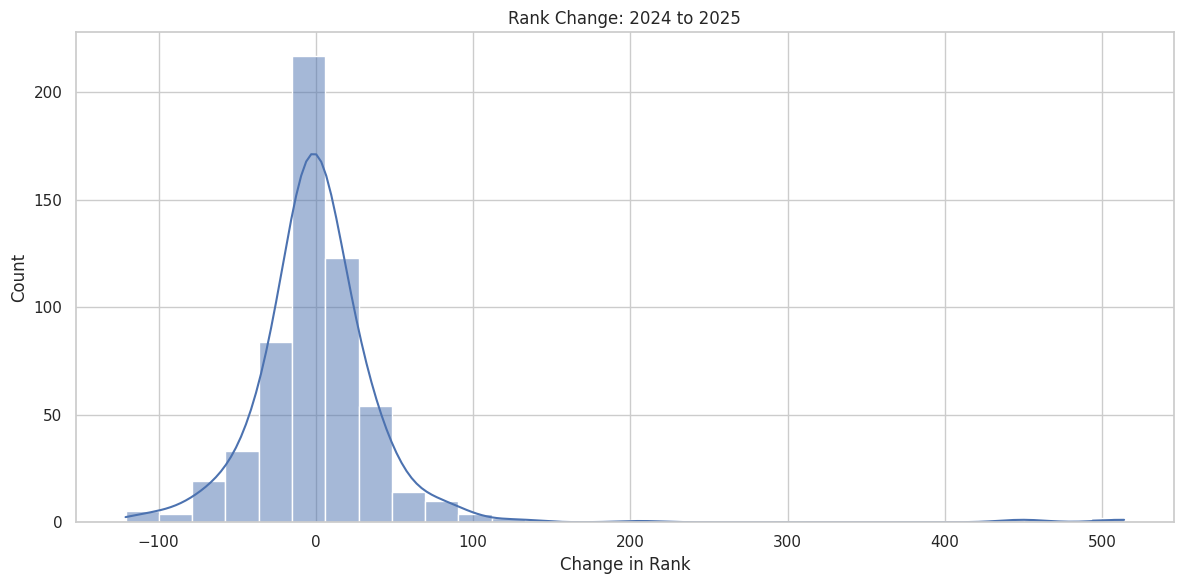

In [ ]:
df["Rank_Change"] = df["RANK_2024"] - df["RANK_2025"]
plt.figure()
sns.histplot(df["Rank_Change"], bins=30, kde=True)
plt.title("Rank Change: 2024 to 2025")
plt.xlabel("Change in Rank")
plt.tight_layout()
plt.show()

In [ ]:
df

,RANK_2025,RANK_2024,Institution_Name,Academic_Reputation_Score,Academic_Reputation_Rank,Employer_Reputation_Score,Employer_Reputation_Rank,Faculty_Student_Score,Faculty_Student_Rank,Citations_per_Faculty_Score,...,FOCUS_CO,FOCUS_FC,FOCUS_FO,FOCUS_SP,RES._HI,RES._MD,RES._VH,STATUS_A,STATUS_B,STATUS_C
0,1,1.0,Massachusetts Institute of Technology (MIT),1.000000,0.995000,1.000000,0.998333,1.000000,9.885387e-01,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,6.0,Imperial College London,0.984520,0.965000,0.994908,0.983333,0.981651,9.398281e-01,0.938322,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3,3.0,University of Oxford,1.000000,0.998333,1.000000,0.993333,1.000000,9.928367e-01,0.846309,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,4.0,Harvard University,1.000000,1.000000,1.000000,1.000000,0.962283,9.283668e-01,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5,2.0,University of Cambridge,1.000000,0.996667,1.000000,0.995000,1.000000,9.799427e-01,0.844287,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,592,514.0,Universität Bremen,0.158927,0.185000,0.060081,0.000000,0.114169,1.110223e-16,0.235592,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
594,595,542.0,ITMO University,0.076367,0.000000,0.114053,0.000000,0.954128,9.197708e-01,0.043478,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
595,596,600.0,Thammasat University,0.221878,0.410000,0.179226,0.226667,0.251784,1.962751e-01,0.010111,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
597,596,491.0,University of Iowa,0.157895,0.180000,0.070265,0.000000,0.405708,4.713467e-01,0.182002,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Mengubah kolom target ke numerik

In [ ]:
df["Overall_Score"] = pd.to_numeric(df["Overall_Score"], errors='coerce')

In [ ]:
df.dtypes

,0
RANK_2025,int64
RANK_2024,float64
Institution_Name,object
Academic_Reputation_Score,float64
Academic_Reputation_Rank,float64
...,...
RES._MD,float64
RES._VH,float64
STATUS_A,float64
STATUS_B,float64


# MODELLING

## Memisahkan fitur dan target

In [ ]:
df = df.dropna()

X = df.drop(columns=["Institution_Name", "RANK_2024", "RANK_2025", "Overall_Score"])
y = df["Overall_Score"]

## Standardisasi fitur

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Reduksi dimensi dengan PCA

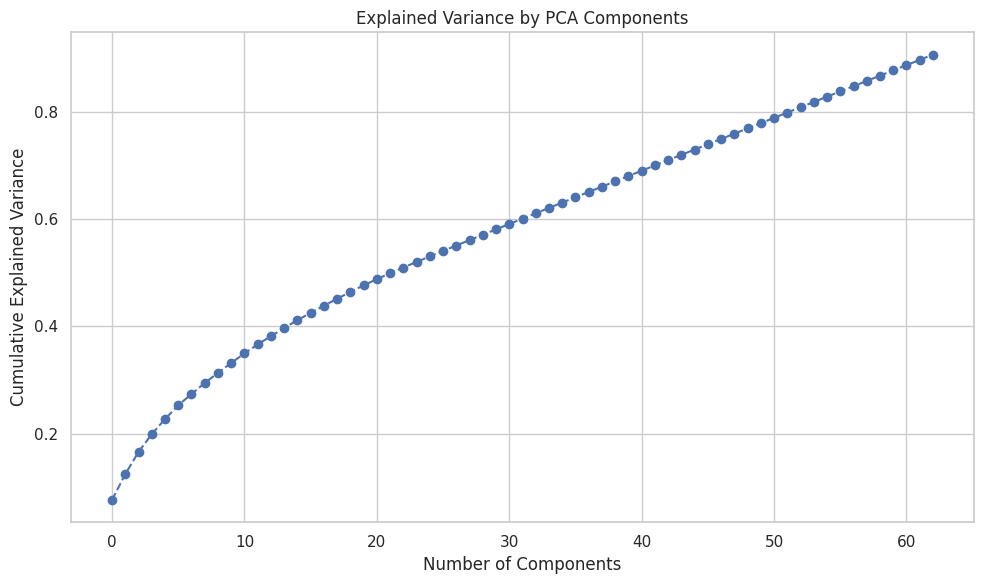

Original number of features: 102
Reduced number of features with PCA: 63


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features with PCA: {X_pca.shape[1]}")


##  Menampilkan kontribusi terbesar pada setiap komponen


In [ ]:
import pandas as pd
import numpy as np

feature_names = X.columns

components_df = pd.DataFrame(pca.components_, columns=feature_names)

for i, row in components_df.iterrows():
    top_features = row.abs().sort_values(ascending=False).head(3)
    print(f"\nTop features for Principal Component {i+1}:")
    for feature_name, weight in top_features.items():
        print(f"- {feature_name}: {weight:.4f}")


Top features for Principal Component 1:
- Academic_Reputation_Score: 0.2902
- Sustainability_Rank: 0.2870
- Academic_Reputation_Rank: 0.2864

Top features for Principal Component 2:
- International_Faculty_Score: 0.2574
- International_Faculty_Rank: 0.2468
- Employer_Reputation_Rank: 0.2164

Top features for Principal Component 3:
- International_Students_Score: 0.3006
- International_Students_Rank: 0.2980
- International_Faculty_Rank: 0.2670

Top features for Principal Component 4:
- Citations_per_Faculty_Score: 0.4058
- Citations_per_Faculty_Rank: 0.3941
- Region_Europe: 0.3282

Top features for Principal Component 5:
- Region_Americas: 0.3022
- Region_Europe: 0.2728
- Faculty_Student_Rank: 0.2621

Top features for Principal Component 6:
- Location_United States: 0.3796
- Region_Americas: 0.3216
- RES._HI: 0.2750

Top features for Principal Component 7:
- Region_Africa: 0.5518
- Location_South Africa: 0.4688
- Location_Egypt: 0.2885

Top features for Principal Component 8:
- SIZE_L:

## Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=537)


## Inisiasi Model yg akan digunakan

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
print(X.columns)


Index(['Academic_Reputation_Score', 'Academic_Reputation_Rank',
       'Employer_Reputation_Score', 'Employer_Reputation_Rank',
       'Faculty_Student_Score', 'Faculty_Student_Rank',
       'Citations_per_Faculty_Score', 'Citations_per_Faculty_Rank',
       'International_Faculty_Score', 'International_Faculty_Rank',
       ...
       'FOCUS_CO', 'FOCUS_FC', 'FOCUS_FO', 'FOCUS_SP', 'RES._HI', 'RES._MD',
       'RES._VH', 'STATUS_A', 'STATUS_B', 'STATUS_C'],
      dtype='object', length=102)


## Melatih model dan visualisasi feature importance

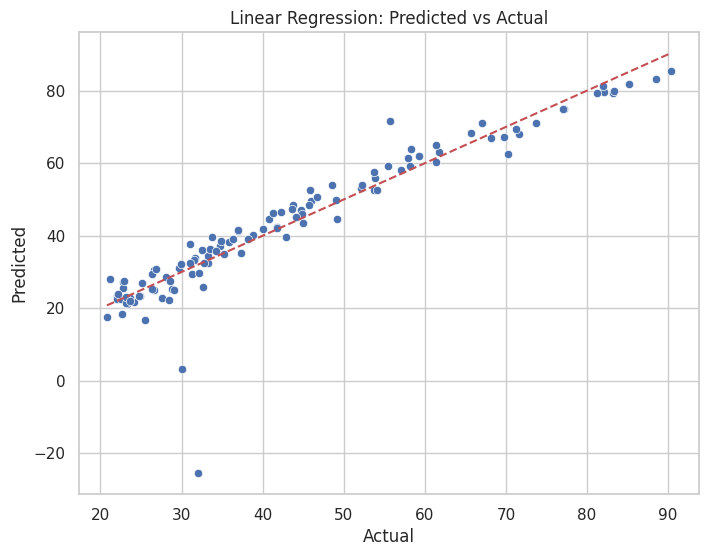

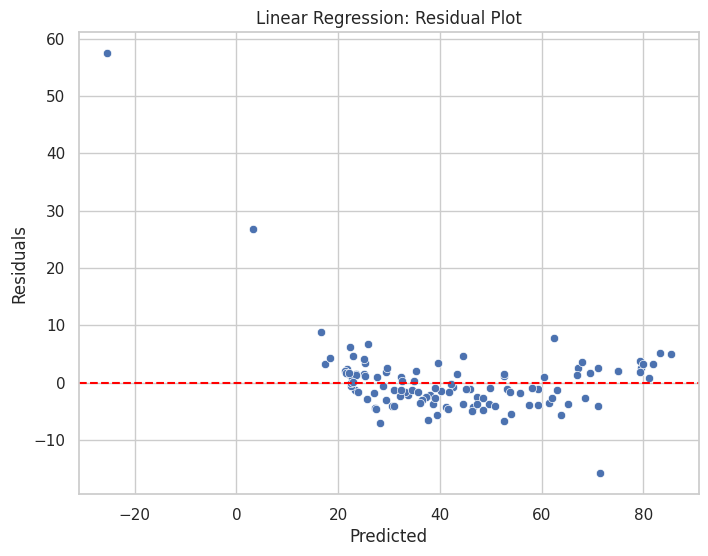

<ipython-input-48-67228134ac0e>:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




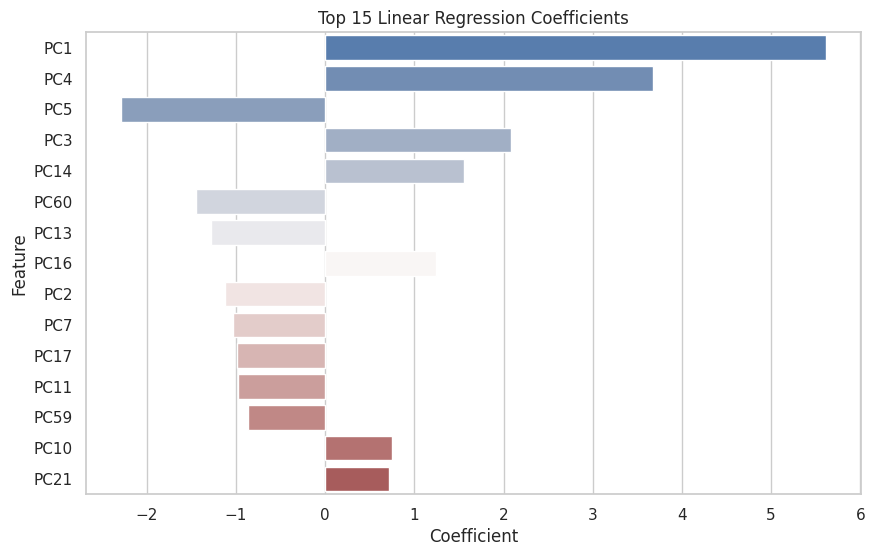

<ipython-input-48-67228134ac0e>:56: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




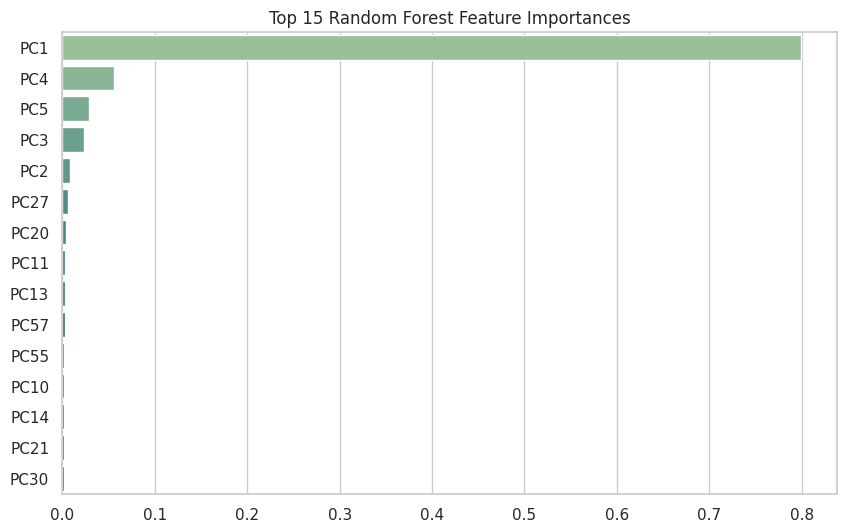

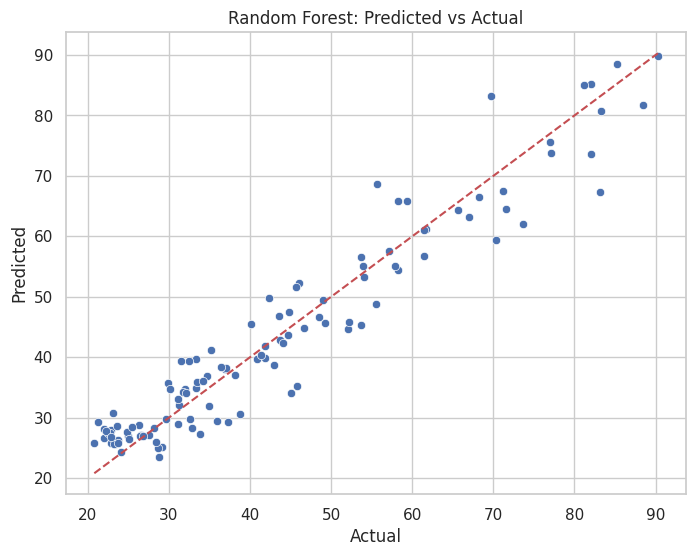

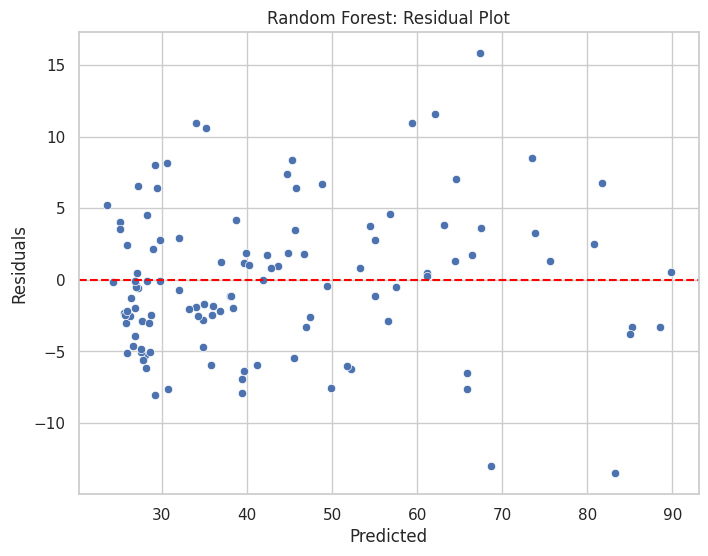

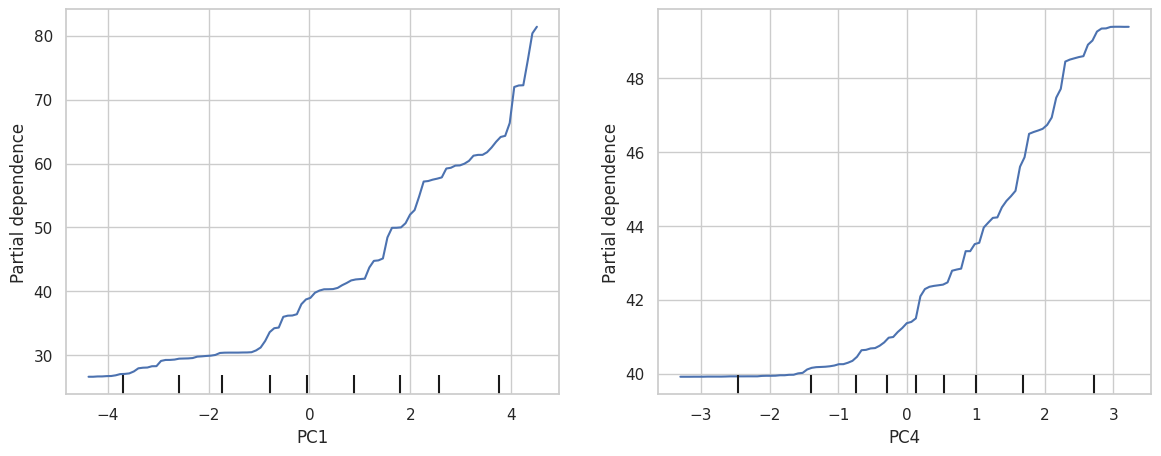

<Figure size 1000x800 with 0 Axes>

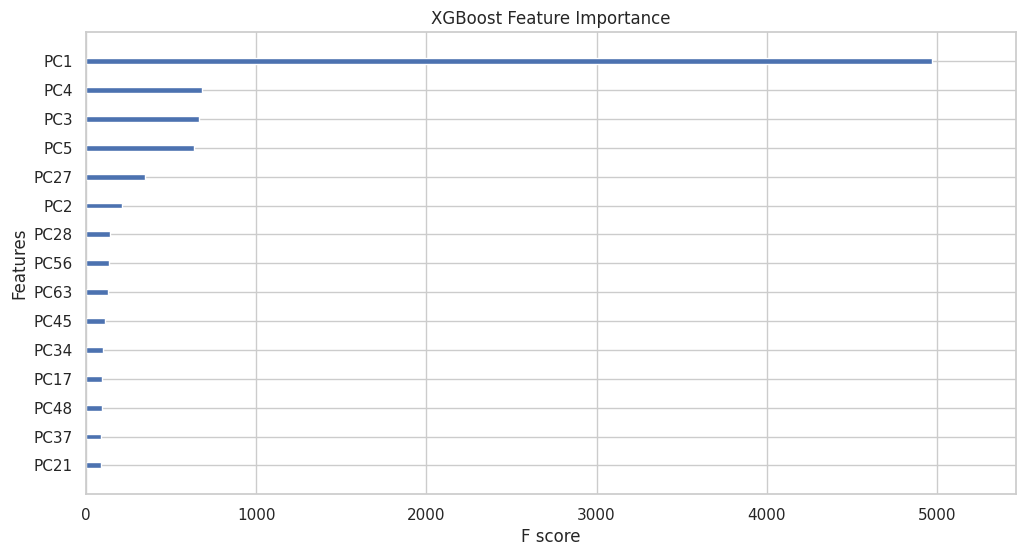

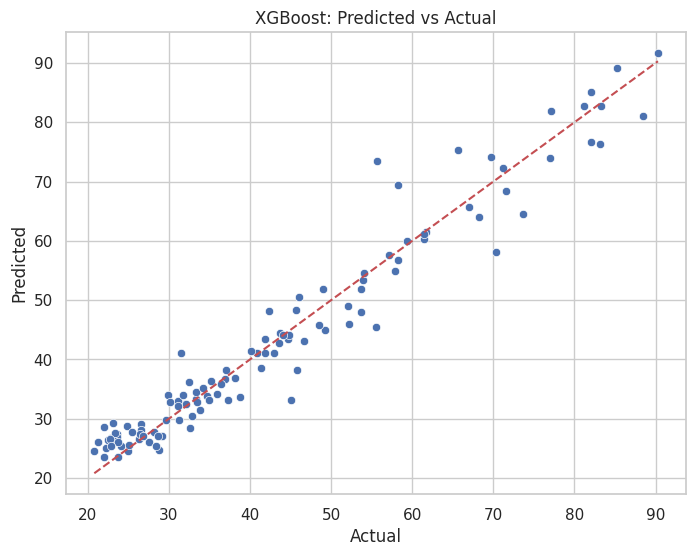

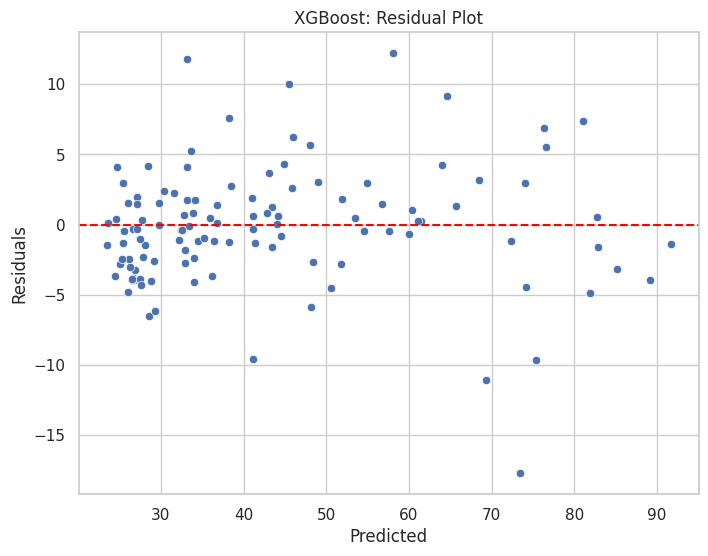

Training dan evaluasi selesai.
Summary results:
Model: LinearRegression, R2: 0.8598, MSE: 47.7024
Model: RandomForest, R2: 0.9240, MSE: 25.8504
Model: XGBoost, R2: 0.9469, MSE: 18.0774


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import PartialDependenceDisplay
from xgboost import plot_importance

feature_names = [f'PC{i+1}' for i in range(X_train.shape[1])]
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, mse))

    if name == "LinearRegression":
        # Plot Predicted vs Actual
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title("Linear Regression: Predicted vs Actual")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.show()

        # Residual Plot
        residuals = y_test - y_pred
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(0, linestyle='--', color='red')
        plt.title("Linear Regression: Residual Plot")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.show()

        # Coefficient Plot
        coefs = model.coef_
        coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefs})
        coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
        coef_top15 = coef_df.head(15)
        plt.figure(figsize=(10,6))
        sns.barplot(x="Coefficient", y="Feature", data=coef_top15, palette="vlag")
        plt.title("Top 15 Linear Regression Coefficients")
        plt.show()

    elif name == "RandomForest":
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        top15_indices = indices[:15]
        plt.figure(figsize=(10,6))
        sns.barplot(x=importances[top15_indices], y=np.array(feature_names)[top15_indices], palette="crest")
        plt.title("Top 15 Random Forest Feature Importances")
        plt.show()

        # Predicted vs Actual
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title("Random Forest: Predicted vs Actual")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.show()

        # Residual Plot
        residuals = y_test - y_pred
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(0, linestyle='--', color='red')
        plt.title("Random Forest: Residual Plot")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.show()

        # Partial Dependence Plot (jika fitur masuk akal secara interpretasi)
        top_features = [feature_names[i] for i in indices[:2]]
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        for i, feat in enumerate(top_features):
            PartialDependenceDisplay.from_estimator(model, X_test_df, [feat], ax=ax[i])
        plt.show()

    elif name == "XGBoost":
        model.get_booster().feature_names = feature_names
        plt.figure(figsize=(10,8))
        plot_importance(model, max_num_features=15, importance_type='gain', show_values=False)
        plt.title("XGBoost Feature Importance")
        plt.show()

        # Predicted vs Actual
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title("XGBoost: Predicted vs Actual")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.show()

        # Residual Plot
        residuals = y_test - y_pred
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(0, linestyle='--', color='red')
        plt.title("XGBoost: Residual Plot")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.show()

print("Training dan evaluasi selesai.")
print("Summary results:")
for r in results:
    print(f"Model: {r[0]}, R2: {r[1]:.4f}, MSE: {r[2]:.4f}")


# EVALUASI MODEL

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "MSE"]).sort_values(by="R2_Score", ascending=False)
results_df

,Model,R2_Score,MSE
2,XGBoost,0.946857,18.077412
1,RandomForest,0.924007,25.850418
0,LinearRegression,0.859768,47.702350
